In [81]:
# Import libraries

In [82]:
# Core Python libraries
import numpy as np
import pandas as pd
import os
import warnings

In [83]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [84]:
# Stats & Time-Series
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf

In [85]:
# Machine Learning & Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [86]:
# TensorFlow / Keras (Deep learning models)
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, GRU, SimpleRNN, Dense, Dropout, Bidirectional

In [87]:
# Utility Libraries
from datetime import datetime
import itertools

In [88]:
import itertools

sequence_lengths = [30, 60, 90]
batch_sizes = [16, 32]
learning_rates = [0.001, 0.0005]

grid = list(itertools.product(sequence_lengths, batch_sizes, learning_rates))

print("Hyperparameter combinations:")
for seq_len, bs, lr in grid:
    print(f"Sequence: {seq_len}, Batch: {bs}, LR: {lr}")

Hyperparameter combinations:
Sequence: 30, Batch: 16, LR: 0.001
Sequence: 30, Batch: 16, LR: 0.0005
Sequence: 30, Batch: 32, LR: 0.001
Sequence: 30, Batch: 32, LR: 0.0005
Sequence: 60, Batch: 16, LR: 0.001
Sequence: 60, Batch: 16, LR: 0.0005
Sequence: 60, Batch: 32, LR: 0.001
Sequence: 60, Batch: 32, LR: 0.0005
Sequence: 90, Batch: 16, LR: 0.001
Sequence: 90, Batch: 16, LR: 0.0005
Sequence: 90, Batch: 32, LR: 0.001
Sequence: 90, Batch: 32, LR: 0.0005


In [89]:
!pip install ta

In [90]:
!pip install pmdarima

In [91]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [92]:
print("Num GPUs Available:", len(tf.config.list_physical_devices("GPU")))

Num GPUs Available: 0


In [93]:
# Load Data

In [94]:
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")

# Convert 'Date' column to datetime format
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

google_training_complete.head(10)

Date       Open       High        Low      Close  Adj Close     Volume
0 2010-01-04  15.689439  15.753504  15.621622  15.684434  15.684434   78169752
1 2010-01-05  15.695195  15.711712  15.554054  15.615365  15.615365  120067812
2 2010-01-06  15.662162  15.662162  15.174174  15.221722  15.221722  158988852
3 2010-01-07  15.250250  15.265265  14.831081  14.867367  14.867367  256315428
4 2010-01-08  14.814815  15.096346  14.742492  15.065566  15.065566  188783028
5 2010-01-11  15.126627  15.126627  14.865866  15.042793  15.042793  288227484
6 2010-01-12  14.956206  14.968969  14.714715  14.776777  14.776777  193937868
7 2010-01-13  14.426677  14.724224  14.361862  14.691942  14.691942  259604136
8 2010-01-14  14.612112  14.869870  14.584835  14.761011  14.761011  169434396
9 2010-01-15  14.848348  14.853854  14.465465  14.514515  14.514515  217162620

In [95]:
# EDA

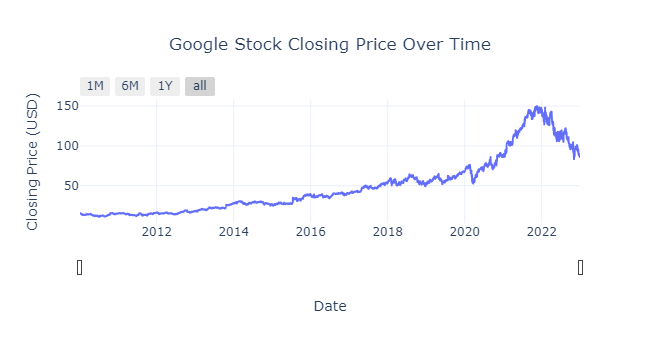

In [96]:
fig1 = px.line(
    google_training_complete,
    x='Date',
    y='Close',
    title='Google Stock Closing Price Over Time',
    labels={'Close': 'Closing Price (USD)', 'Date': 'Date'},
)

fig1.update_layout(
    template='plotly_white',
    title_x=0.5,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1M', step='month', stepmode='backward'),
                dict(count=6, label='6M', step='month', stepmode='backward'),
                dict(count=1, label='1Y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True)
    )
)

fig1.update_traces(
    hovertemplate='Date: %{x}<br>Close: $%{y:.2f}<extra></extra>'
)

fig1.show()

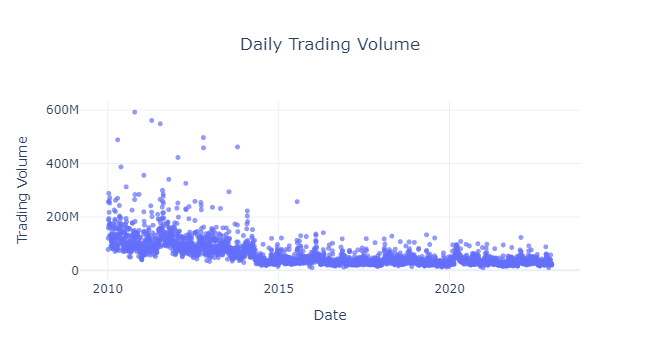

In [97]:
fig2 = px.scatter(
    google_training_complete,
    x='Date',
    y='Volume',
    title='Daily Trading Volume'
)

fig2.update_layout(
    template='plotly_white',
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Trading Volume'
)

# Tooltip with + sign and comma formatting
fig2.update_traces(
    marker=dict(size=5, opacity=0.7),
    hovertemplate='Date: %{x}<br>Volume: %{y:,}<extra></extra>'
)

fig2.show()

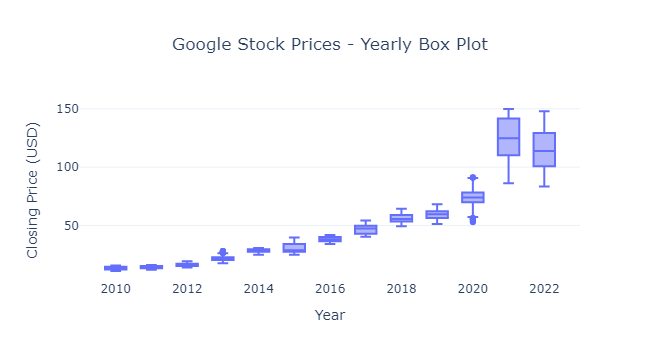

In [98]:
# Add Year column
google_training_complete['Year'] = google_training_complete['Date'].dt.year

# Box plot
fig3 = px.box(
    google_training_complete,
    x='Year',
    y='Close',
    title='Google Stock Prices - Yearly Box Plot'
)

fig3.update_layout(
    template='plotly_white',
    title_x=0.5,
    xaxis_title='Year',
    yaxis_title='Closing Price (USD)'
)

fig3.update_traces(
    hovertemplate='Year: %{x}<br>Close: $%{y:.2f}<extra></extra>',
    width=0.6  # medium width boxes
)

fig3.show()


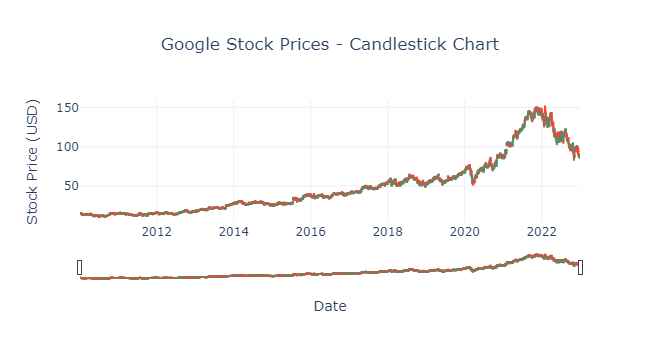

In [99]:
hover_text = (
    "Date: " + google_training_complete['Date'].astype(str) +
    "<br>Open: $" + google_training_complete['Open'].round(2).astype(str) +
    "<br>High: $" + google_training_complete['High'].round(2).astype(str) +
    "<br>Low: $" + google_training_complete['Low'].round(2).astype(str) +
    "<br>Close: $" + google_training_complete['Close'].round(2).astype(str)
)

fig4 = go.Figure(
    data=[
        go.Candlestick(
            x=google_training_complete['Date'],
            open=google_training_complete['Open'],
            high=google_training_complete['High'],
            low=google_training_complete['Low'],
            close=google_training_complete['Close'],
            text=hover_text,
            hoverinfo="text",   # <-- This replaces hovertemplate
            name="GOOGL"
        )
    ]
)

fig4.update_layout(
    title='Google Stock Prices - Candlestick Chart',
    title_x=0.5,
    template='plotly_white',
    xaxis_title='Date',
    yaxis_title='Stock Price (USD)',
    xaxis_rangeslider_visible=True
)

fig4.show()


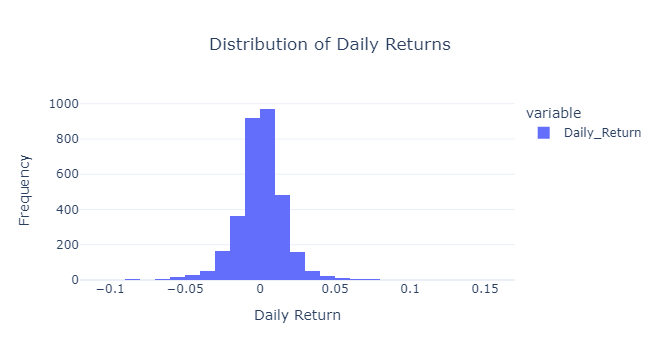

In [100]:
# Calculate daily returns
google_training_complete['Daily_Return'] = google_training_complete['Close'].pct_change()

# Drop NaN from first row
returns = google_training_complete['Daily_Return'].dropna()

fig5 = px.histogram(
    returns,
    nbins=30,
    title='Distribution of Daily Returns',
    labels={'value': 'Daily Return'}
)

fig5.update_layout(
    template='plotly_white',
    title_x=0.5,
    xaxis_title='Daily Return',
    yaxis_title='Frequency'
)

fig5.show()

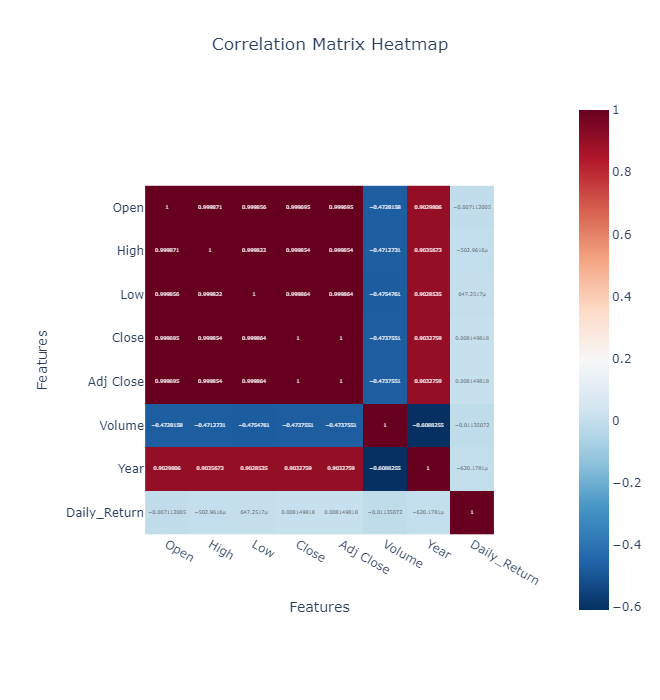

In [101]:
# Compute correlation matrix
correlation_matrix = google_training_complete.corr(numeric_only=True)

# Bigger and clearer heatmap
fig6 = px.imshow(
    correlation_matrix,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title='Correlation Matrix Heatmap',
    width=900,      # increased width
    height=700      # increased height
)

fig6.update_layout(
    template='plotly_white',
    title_x=0.5,
    xaxis_title='Features',
    yaxis_title='Features'
)

fig6.show()

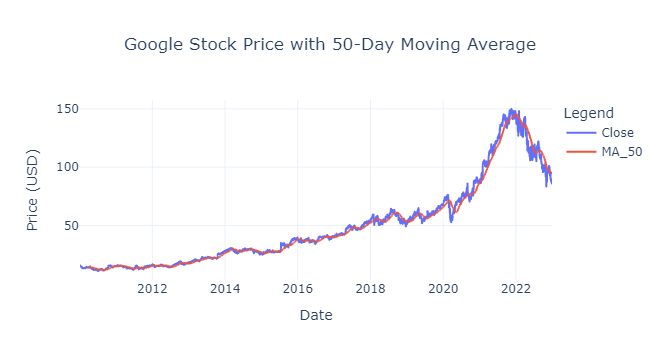

In [102]:
# Calculate 50-day moving average
google_training_complete['MA_50'] = google_training_complete['Close'].rolling(window=50).mean()

# Line chart
fig7 = px.line(
    google_training_complete,
    x='Date',
    y=['Close', 'MA_50'],
    title='Google Stock Price with 50-Day Moving Average',
    labels={'value': 'Price (USD)', 'variable': 'Legend'}
)

fig7.update_layout(
    template='plotly_white',
    title_x=0.5,
    xaxis_title="Date",
    yaxis_title="Price (USD)"
)

fig7.update_traces(line=dict(width=2))  # clearer lines

fig7.show()

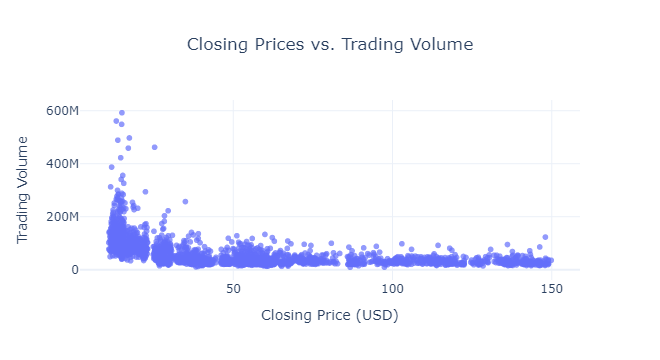

In [103]:
fig8 = px.scatter(
    google_training_complete,
    x='Close',
    y='Volume',
    title='Closing Prices vs. Trading Volume',
    opacity=0.7
)

fig8.update_layout(
    template='plotly_white',
    title_x=0.5,
    xaxis_title='Closing Price (USD)',
    yaxis_title='Trading Volume'
)

fig8.update_traces(
    marker=dict(size=6),
    hovertemplate='Close: $%{x:.2f}<br>Volume: %{y:,}<extra></extra>'
)

fig8.show()

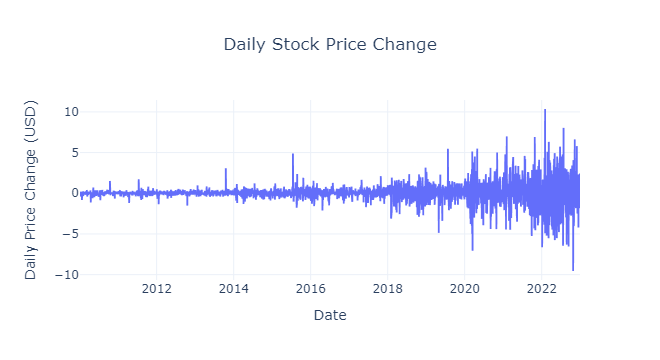

In [104]:
# Calculate daily change in closing price
google_training_complete['Daily_Change'] = google_training_complete['Close'].diff()

fig9 = px.line(
    google_training_complete,
    x='Date',
    y='Daily_Change',
    title='Daily Stock Price Change',
    labels={'Daily_Change': 'Price Change (USD)', 'Date': 'Date'}
)

fig9.update_layout(
    template='plotly_white',
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Daily Price Change (USD)'
)

fig9.update_traces(line=dict(width=1.8))

fig9.show()

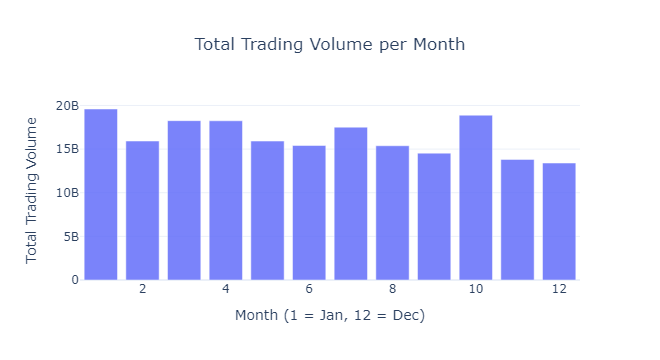

In [105]:
# Extract month
google_training_complete['Month'] = google_training_complete['Date'].dt.month

# Group by month
monthly_volume = google_training_complete.groupby('Month')['Volume'].sum().reset_index()

# Bar chart
fig10 = px.bar(
    monthly_volume,
    x='Month',
    y='Volume',
    title='Total Trading Volume per Month',
    labels={'Month': 'Month', 'Volume': 'Total Volume'}
)

fig10.update_layout(
    template='plotly_white',
    title_x=0.5,
    xaxis_title='Month (1 = Jan, 12 = Dec)',
    yaxis_title='Total Trading Volume'
)

fig10.update_traces(
    hovertemplate='Month: %{x}<br>Volume: %{y:,}<extra></extra>',
    marker=dict(opacity=0.85)
)

fig10.show()

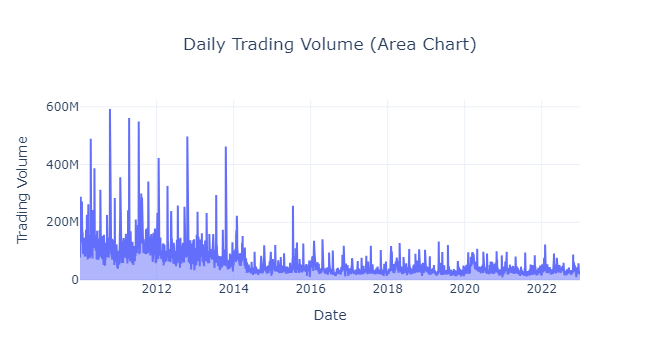

In [106]:
fig11 = px.area(
    google_training_complete,
    x='Date',
    y='Volume',
    title='Daily Trading Volume (Area Chart)',
    labels={'Volume': 'Trading Volume', 'Date': 'Date'}
)

fig11.update_layout(
    template='plotly_white',
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Trading Volume'
)

fig11.update_traces(
    hovertemplate='Date: %{x}<br>Volume: %{y:,}<extra></extra>',
    opacity=0.7  # medium transparency for clean visualization
)

fig11.show()

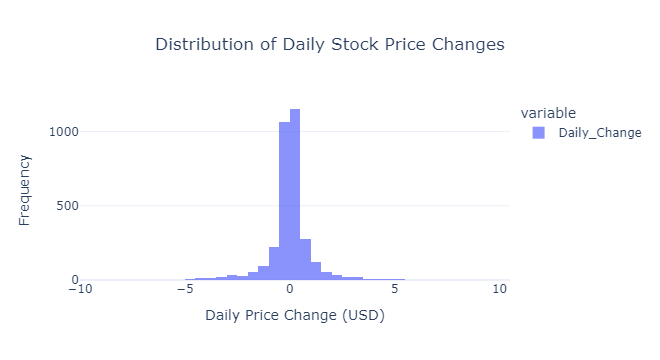

In [107]:
# Drop NaN values (first diff is NaN)
daily_changes = google_training_complete['Daily_Change'].dropna()

fig12 = px.histogram(
    daily_changes,
    nbins=40,   # smoother shape, still simple
    title='Distribution of Daily Stock Price Changes',
    labels={'value': 'Daily Price Change (USD)'}
)

fig12.update_layout(
    template='plotly_white',
    title_x=0.5,
    xaxis_title='Daily Price Change (USD)',
    yaxis_title='Frequency'
)

fig12.update_traces(
    hovertemplate='Change: %{x:.2f}<br>Count: %{y}<extra></extra>',
    opacity=0.75
)

fig12.show()

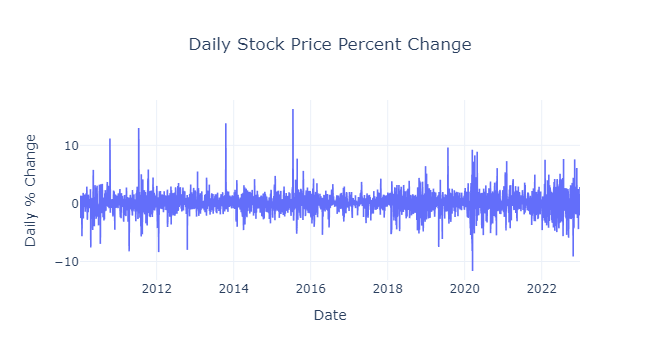

In [108]:
# Calculate daily percent change
google_training_complete['Daily_Pct_Change'] = google_training_complete['Close'].pct_change() * 100

fig13 = px.line(
    google_training_complete,
    x='Date',
    y='Daily_Pct_Change',
    title='Daily Stock Price Percent Change',
    labels={'Daily_Pct_Change': 'Percentage Change (%)', 'Date': 'Date'}
)

fig13.update_layout(
    template='plotly_white',
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Daily % Change'
)

fig13.update_traces(line=dict(width=1.6))

fig13.show()

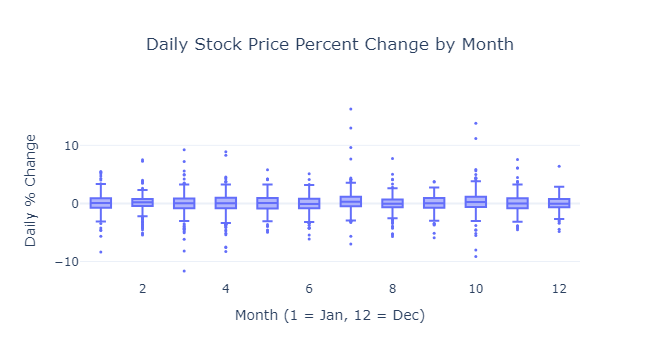

In [109]:
fig14 = px.box(
    google_training_complete,
    x='Month',
    y='Daily_Pct_Change',
    title='Daily Stock Price Percent Change by Month',
    labels={'Month': 'Month', 'Daily_Pct_Change': 'Daily % Change'}
)

fig14.update_layout(
    template='plotly_white',
    title_x=0.5,
    xaxis_title='Month (1 = Jan, 12 = Dec)',
    yaxis_title='Daily % Change'
)

fig14.update_traces(
    marker=dict(size=3),
    boxpoints='outliers'  # medium-level detail
)

fig14.show()

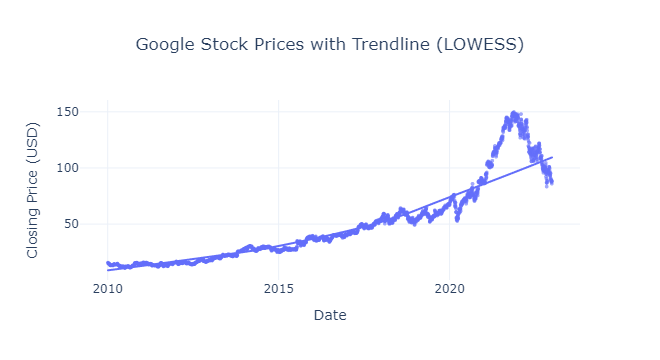

In [110]:
fig15 = px.scatter(
    google_training_complete,
    x='Date',
    y='Close',
    title='Google Stock Prices with Trendline (LOWESS)',
    opacity=0.6,
    labels={'Close': 'Closing Price (USD)', 'Date': 'Date'},
    trendline='lowess'
)

fig15.update_layout(
    template='plotly_white',
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Closing Price (USD)'
)

fig15.update_traces(
    marker=dict(size=4),
    hovertemplate='Date: %{x}<br>Close: $%{y:.2f}<extra></extra>'
)

fig15.show()

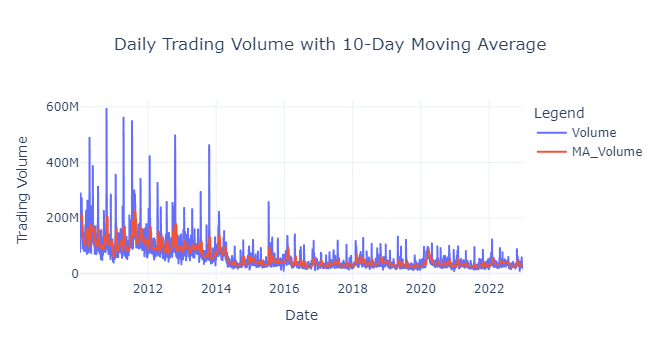

In [111]:
# Calculate 10-day moving average of volume
google_training_complete['MA_Volume'] = google_training_complete['Volume'].rolling(window=10).mean()

fig16 = px.line(
    google_training_complete,
    x='Date',
    y=['Volume', 'MA_Volume'],
    title='Daily Trading Volume with 10-Day Moving Average',
    labels={'value': 'Volume', 'variable': 'Legend'}
)

fig16.update_layout(
    template='plotly_white',
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Trading Volume'
)

fig16.update_traces(line=dict(width=2))

fig16.show()

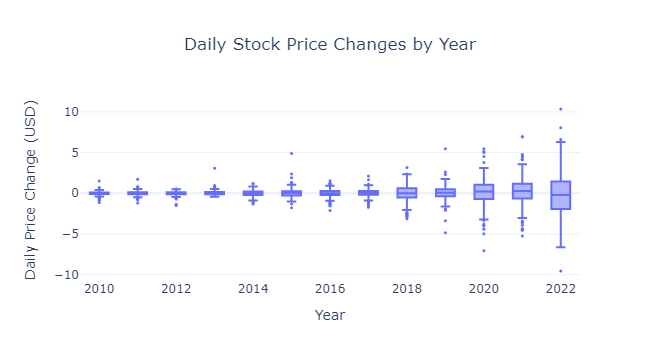

In [112]:
fig17 = px.box(
    google_training_complete,
    x='Year',
    y='Daily_Change',
    title='Daily Stock Price Changes by Year',
    labels={'Year': 'Year', 'Daily_Change': 'Daily Price Change (USD)'}
)

fig17.update_layout(
    template='plotly_white',
    title_x=0.5,
    xaxis_title='Year',
    yaxis_title='Daily Price Change (USD)'
)

fig17.update_traces(
    marker=dict(size=3),
    boxpoints='outliers'   # show outliers clearly
)

fig17.show()

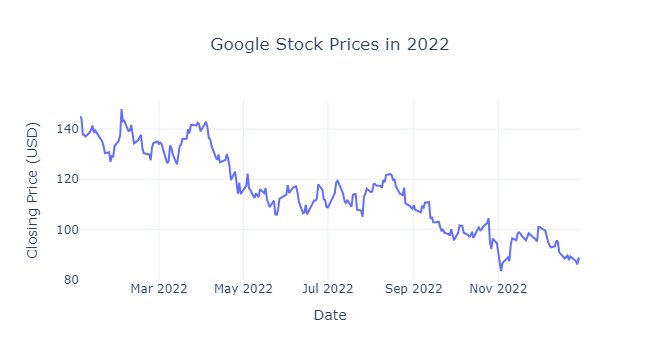

In [113]:
# Filter data for 2022
df_2022 = google_training_complete[google_training_complete['Year'] == 2022]

# Plot only 2022 data
fig18 = px.line(
    df_2022,
    x='Date',
    y='Close',
    title='Google Stock Prices in 2022',
    labels={'Close': 'Closing Price (USD)', 'Date': 'Date'}
)

fig18.update_layout(
    template='plotly_white',
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Closing Price (USD)'
)

fig18.update_traces(line=dict(width=2))

fig18.show()

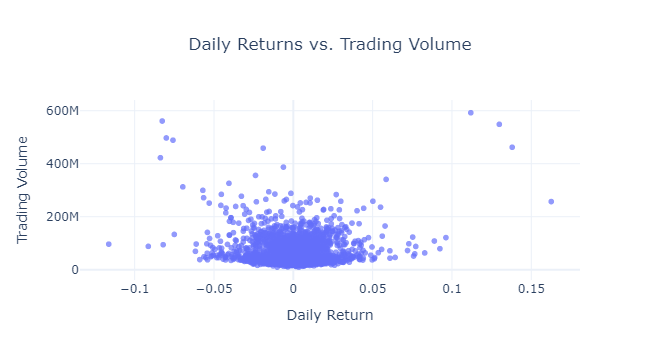

In [114]:
# Remove NaN values from Daily_Return (first row)
df_returns = google_training_complete.dropna(subset=['Daily_Return'])

fig19 = px.scatter(
    df_returns,
    x='Daily_Return',
    y='Volume',
    title='Daily Returns vs. Trading Volume',
    labels={'Daily_Return': 'Daily Return', 'Volume': 'Trading Volume'},
    opacity=0.7
)

fig19.update_layout(
    template='plotly_white',
    title_x=0.5,
    xaxis_title='Daily Return',
    yaxis_title='Trading Volume'
)

fig19.update_traces(
    marker=dict(size=6),
    hovertemplate='Return: %{x:.4f}<br>Volume: %{y:,}<extra></extra>'
)

fig19.show()

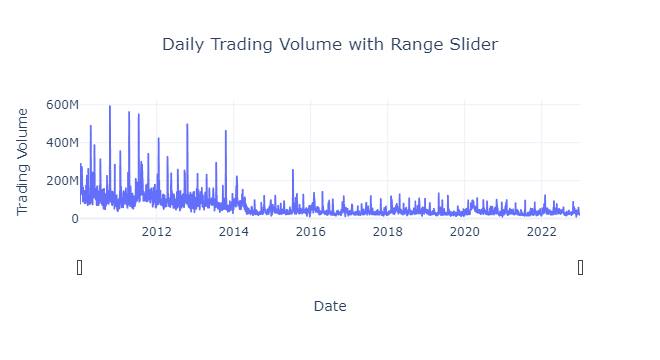

In [115]:
fig20 = px.line(
    google_training_complete,
    x='Date',
    y='Volume',
    title='Daily Trading Volume with Range Slider',
    labels={'Volume': 'Trading Volume', 'Date': 'Date'}
)

fig20.update_layout(
    template='plotly_white',
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Trading Volume'
)

fig20.update_xaxes(rangeslider_visible=True)

fig20.update_traces(line=dict(width=1.8))

fig20.show()

In [116]:
# Data preprocessing

In [117]:
# Selecting column index 4 (Close price) → using iloc[:, 4:5] keeps 2D shape
google_training_processed = google_training_complete.iloc[:, 4:5].values

# Show type and shape
print("Type:", type(google_training_processed))
print("Shape:", google_training_processed.shape)

# First 10 rows (numpy array)
print("First 10 rows:")
print(google_training_processed[:10])

# Convert to DataFrame for cleaner display
processed_df = pd.DataFrame(google_training_processed, columns=['Close_Selected'])
processed_df.head(10)

Type: <class 'numpy.ndarray'>
Shape: (3272, 1)
First 10 rows:
[[15.684434]
 [15.615365]
 [15.221722]
 [14.867367]
 [15.065566]
 [15.042793]
 [14.776777]
 [14.691942]
 [14.761011]
 [14.514515]]


Close_Selected
0       15.684434
1       15.615365
2       15.221722
3       14.867367
4       15.065566
5       15.042793
6       14.776777
7       14.691942
8       14.761011
9       14.514515

In [118]:
from sklearn.preprocessing import MinMaxScaler

# 1. Select the 'Close' column (index 4) as a 2D array
google_training_processed = google_training_complete.iloc[:, 4:5].values

# 2. Scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
google_training_scaled = scaler.fit_transform(google_training_processed)

print("Scaled data (first 5 rows):")
print(google_training_scaled[:5])
print("Scaled shape:", google_training_scaled.shape)

# 3. Create sequences (features) and labels
features_set = []
labels = []

for i in range(60, google_training_scaled.shape[0]):
    # previous 60 days as features
    features_set.append(google_training_scaled[i-60:i, 0])
    # current day as label
    labels.append(google_training_scaled[i, 0])

# 4. Convert to NumPy arrays
features_set = np.array(features_set)
labels = np.array(labels)

print("Before reshape - features_set shape:", features_set.shape)
print("Labels shape:", labels.shape)

# 5. Reshape for LSTM: (samples, timesteps, features)
features_set = features_set.reshape(features_set.shape[0], features_set.shape[1], 1)

print("After reshape - features_set shape:", features_set.shape)

Scaled data (first 5 rows):
[[0.03434761]
 [0.03385045]
 [0.03101697]
 [0.0284663 ]
 [0.02989295]]
Scaled shape: (3272, 1)
Before reshape - features_set shape: (3212, 60)
Labels shape: (3212,)
After reshape - features_set shape: (3212, 60, 1)


In [119]:
# RNN

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 60, 300)        │        90,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 60, 300)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 60, 100)        │        40,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 60, 100)        │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,001 (667.97 KB)

 Trainable params: 171,001 (667.97 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.5106 - val_loss: 0.2269 - learning_rate: 0.0010
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.2379 - val_loss: 0.3373 - learning_rate: 0.0010
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.1614 - val_loss: 0.6543 - learning_rate: 0.0010
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1222 - val_loss: 0.4787 - learning_rate: 0.0010
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.1072 - val_loss: 0.6266 - learning_rate: 0.0010
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0891 - val_loss: 0.5201 - learning_rate: 0.0010
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0720 - val_loss: 0.3686 - learning_rate: 0.0010
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0634
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0634 - val_loss: 0.3587 - learning_r

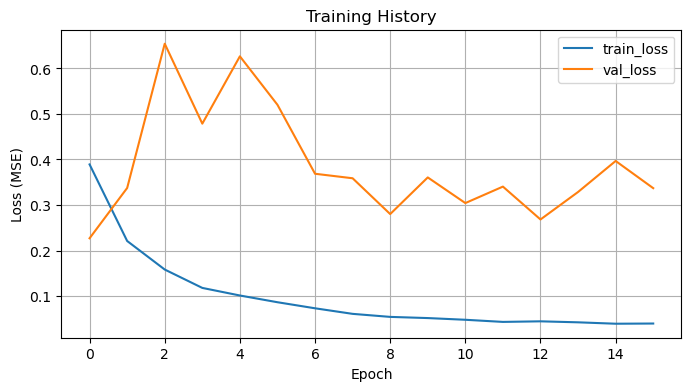

In [120]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Build model
RNN_model = Sequential()

# First RNN layer (returns sequences because another RNN follows)
RNN_model.add(SimpleRNN(units=300, return_sequences=True, input_shape=(features_set.shape[1], 1)))
RNN_model.add(Dropout(0.2))

# Second RNN layer (also returns sequences because more RNNs follow)
RNN_model.add(SimpleRNN(units=100, return_sequences=True))
RNN_model.add(Dropout(0.2))

# Third RNN layer (returns sequences)
RNN_model.add(SimpleRNN(units=100, return_sequences=True))
RNN_model.add(Dropout(0.2))

# Fourth RNN layer (LAST recurrent layer - do NOT return sequences)
RNN_model.add(SimpleRNN(units=100, return_sequences=False))
RNN_model.add(Dropout(0.2))

# Output layer
RNN_model.add(Dense(units=1))

# Compile AFTER adding all layers
RNN_model.compile(optimizer='adam', loss='mean_squared_error')

# Summary
RNN_model.summary()

# Callbacks (optional but recommended)
es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-6, verbose=1)

# Train the model
# - change epochs to 300 if you want long training; 100 is often a good starting point
history = RNN_model.fit(
    features_set,
    labels,
    epochs=100,
    batch_size=32,
    validation_split=0.12,
    callbacks=[es, rlp],
    verbose=1
)

# Plot training & validation loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='train_loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

In [121]:
# LSTM

Model: "Unique_LSTM_with_Attention"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 60, 1)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_front (Conv1D) │ (None, 60, 32)    │        128 │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_bn             │ (None, 60, 32)    │        128 │ conv_front[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_do (Dropout)   │ (None, 60, 32)    │          0 │ conv_bn[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidir_lstm_1        │ (None, 60, 512)   │    591,872 │ conv_do[0][0]     │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ln_1                │ (None, 60, 512)   │      1,024 │ bidir_lstm_1[0][… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ do_1 (Dropout)      │ (None, 60, 512)   │          0 │ ln_1[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 60, 128)   │    328,192 │ do_1[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ln_2                │ (None, 60, 128)   │        256 │ lstm_2[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ proj_shortcut       │ (None, 60, 128)   │     65,664 │ do_1[0][0]        │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ do_2 (Dropout)      │ (None, 60, 128)   │          0 │ ln_2[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ residual_add (Add)  │ (None, 60, 128)   │          0 │ proj_shortcut[0]… │
│                     │                   │            │ do_2[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ln_res              │ (None, 60, 128)   │        256 │ residual_add[0][… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 60, 128)   │    131,584 │ ln_res[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ do_3 (Dropout)      │ (None, 60, 128)   │          0 │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attn_score (Dense)  │ (None, 60, 1)     │        129 │ do_3[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 60)        │          0 │ attn_score[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attn_weights        │ (None, 60)        │          0 │ flatten_2[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 60, 1)     │          0 │ attn_weights[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attn_multiply       │ (None, 60, 128)   │          0 │ do_3[0][0],       │
│ (Multiply)          │                   │            │ reshape_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,127,554 (4.30 MB)

 Trainable params: 1,127,490 (4.30 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/150
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.0315 - mae: 0.0964
Epoch 1: val_loss improved from inf to 0.24612, saving model to best_unique_lstm.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 159ms/step - loss: 0.0314 - mae: 0.0960 - val_loss: 0.2461 - val_mae: 0.4750 - learning_rate: 0.0010
Epoch 2/150
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.0070 - mae: 0.0326
Epoch 2: val_loss improved from 0.24612 to 0.22471, saving model to best_unique_lstm.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 13s 142ms/step - loss: 0.0070 - mae: 0.0326 - val_loss: 0.2247 - val_mae: 0.4546 - learning_rate: 0.0010
Epoch 3/150
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.0045 - mae: 0.0252
Epoch 3: val_loss improved from 0.22471 to 0.15372, saving model to best_unique_lstm.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - loss: 0.0045 - mae: 0.0252 - val_loss: 0.1537 - val_mae: 0.3714 - learning_rate: 0.0010
Epoch 4/150
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.0037 - mae: 0.0253
Epoch 4

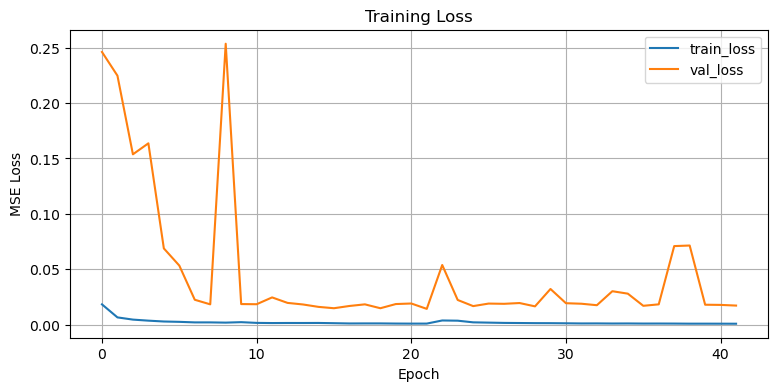

In [122]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Input, Conv1D, BatchNormalization, LayerNormalization,
    Bidirectional, LSTM, Dense, Dropout, Add, GlobalAveragePooling1D,
    Multiply, Permute, Reshape
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt

# === simple attention block (time-distributed attention weights) ===
def attention_block(inputs, name="attention"):
    """
    inputs: tensor with shape (batch, timesteps, features)
    returns: tensor with same shape after applying attention-weighted features
    """
    # compute attention scores
    score_dense = Dense(1, activation='tanh', name=f"{name}_score")(inputs)     # (batch, timesteps, 1)
    score_flat  = tf.keras.layers.Flatten()(score_dense)                        # (batch, timesteps)
    attention_weights = tf.keras.layers.Activation('softmax', name=f"{name}_weights")(score_flat)
    attention_weights = Reshape((-1, 1))(attention_weights)                     # (batch, timesteps, 1)

    # weighted sum of inputs
    weighted = Multiply(name=f"{name}_multiply")([inputs, attention_weights])   # (batch, timesteps, features)
    return weighted

# === model builder ===
def build_unique_lstm(timesteps, features=1, l2_reg=1e-5, conv_filters=32):
    inp = Input(shape=(timesteps, features), name="input")

    # Conv1D front-end to capture local patterns
    x = Conv1D(filters=conv_filters, kernel_size=3, padding='causal', activation='relu',
               kernel_regularizer=l2(l2_reg), name="conv_front")(inp)
    x = BatchNormalization(name="conv_bn")(x)
    x = Dropout(0.12, name="conv_do")(x)

    # Bidirectional LSTM block (first recurrent layer)
    x = Bidirectional(LSTM(units=256, return_sequences=True,
                           kernel_regularizer=l2(l2_reg)),
                      name="bidir_lstm_1")(x)
    x = LayerNormalization(name="ln_1")(x)
    x = Dropout(0.18, name="do_1")(x)

    # Second LSTM block (residual connection)
    r = LSTM(units=128, return_sequences=True, kernel_regularizer=l2(l2_reg), name="lstm_2")(x)
    r = LayerNormalization(name="ln_2")(r)
    r = Dropout(0.15, name="do_2")(r)

    # Residual: add x and r (requires same dimensionality)
    # If dims mismatch, project x to match r dims
    proj = Dense(128, activation=None, name="proj_shortcut")(x)  # (batch, timesteps, 128)
    res = Add(name="residual_add")([proj, r])
    res = LayerNormalization(name="ln_res")(res)

    # Third LSTM block
    x = LSTM(units=128, return_sequences=True, kernel_regularizer=l2(l2_reg), name="lstm_3")(res)
    x = Dropout(0.12, name="do_3")(x)

    # Attention block to pick important timesteps
    att = attention_block(x, name="attn")
    # Optionally pool attention output
    pooled = GlobalAveragePooling1D(name="global_pool")(att)

    # Dense head
    x = Dense(64, activation='relu', kernel_regularizer=l2(l2_reg), name="dense_1")(pooled)
    x = Dropout(0.12, name="do_dense")(x)
    out = Dense(1, activation='linear', name="output")(x)

    model = Model(inputs=inp, outputs=out, name="Unique_LSTM_with_Attention")
    return model

# Build Model
timesteps = features_set.shape[1]
model = build_unique_lstm(timesteps=timesteps, features=1, l2_reg=1e-5, conv_filters=32)

# compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mean_squared_error', metrics=['mae'])
model.summary()

# Callbacks
es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-6, verbose=1)

# Must use .keras extension
mc = ModelCheckpoint("best_unique_lstm.keras", monitor='val_loss', save_best_only=True, verbose=1)

# Train (use validation_split for quick validation) 
history = model.fit(
    features_set,
    labels,
    epochs=150,               # safe default; EarlyStopping will likely stop earlier
    batch_size=32,
    validation_split=0.12,
    callbacks=[es, rlp, mc],
    verbose=1
)

# Plot training history
plt.figure(figsize=(9,4))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

In [123]:
# GRU

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 60, 300)        │       272,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 60, 300)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 60, 100)        │       120,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, 60, 100)        │        60,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 100)            │        60,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 514,601 (1.96 MB)

 Trainable params: 514,601 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0119 - mae: 0.0651
Epoch 1: val_loss improved from inf to 0.00104, saving model to best_gru_model.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 19s 114ms/step - loss: 0.0119 - mae: 0.0647 - val_loss: 0.0010 - val_mae: 0.0269 - learning_rate: 0.0010
Epoch 2/150
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 6.6584e-04 - mae: 0.0174
Epoch 2: val_loss did not improve from 0.00104
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 6.6542e-04 - mae: 0.0174 - val_loss: 0.0044 - val_mae: 0.0585 - learning_rate: 0.0010
Epoch 3/150
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 5.7589e-04 - mae: 0.0162
Epoch 3: val_loss improved from 0.00104 to 0.00095, saving model to best_gru_model.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - loss: 5.7581e-04 - mae: 0.0161 - val_loss: 9.5422e-04 - val_mae: 0.0246 - learning_rate: 0.0010
Epoch 4/150
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 5.4681e-04 - mae: 0.0162
Epoch 4: val_loss improved from 

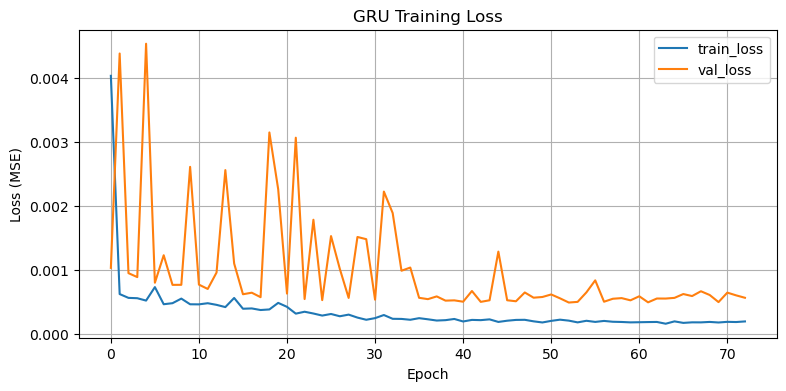

In [124]:
# Build GRU model

GRU_model = Sequential()

# 1st GRU (return sequences because more GRU layers follow)
GRU_model.add(GRU(units=300, return_sequences=True, input_shape=(features_set.shape[1], 1)))
GRU_model.add(Dropout(0.2))

# 2nd GRU
GRU_model.add(GRU(units=100, return_sequences=True))
GRU_model.add(Dropout(0.2))

# 3rd GRU (return_sequences True because another GRU follows)
GRU_model.add(GRU(units=100, return_sequences=True))
GRU_model.add(Dropout(0.2))

# 4th GRU (last recurrent layer; do NOT return sequences)
GRU_model.add(GRU(units=100, return_sequences=False))
GRU_model.add(Dropout(0.2))

# Output layer
GRU_model.add(Dense(units=1))

# Compile AFTER adding all layers
GRU_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Summary
GRU_model.summary()

# Callbacks
es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-6, verbose=1)
mc = ModelCheckpoint("best_gru_model.keras", monitor='val_loss', save_best_only=True, verbose=1)

# Train

history = GRU_model.fit(
    features_set,
    labels,
    epochs=150,            # 150 is a good default; EarlyStopping will stop earlier if needed
    batch_size=32,
    validation_split=0.12, # keep a small val split to monitor generalization
    callbacks=[es, rlp, mc],
    verbose=1
)

# Plot training history

plt.figure(figsize=(9,4))
plt.plot(history.history['loss'], label='train_loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='val_loss')
plt.title('GRU Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [125]:
# Evaluate The Model

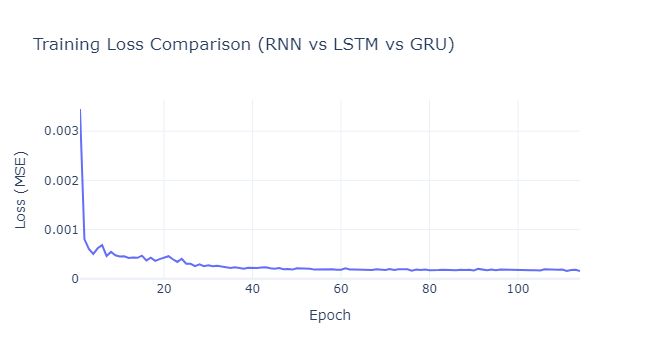

In [126]:
import numpy as np
import plotly.graph_objects as go

fig = go.Figure()

added_any = False

if 'RNN_History' in globals() and RNN_History is not None:
    epochs_rnn = np.arange(1, len(RNN_History.history['loss']) + 1)
    fig.add_trace(go.Scatter(
        x=epochs_rnn,
        y=RNN_History.history['loss'],
        mode='lines',
        name='RNN Training Loss',
        line=dict(width=2),
        hovertemplate='Epoch: %{x}<br>Loss: %{y:.6f}<extra></extra>'
    ))
    added_any = True

if 'LSTM_History' in globals() and LSTM_History is not None:
    epochs_lstm = np.arange(1, len(LSTM_History.history['loss']) + 1)
    fig.add_trace(go.Scatter(
        x=epochs_lstm,
        y=LSTM_History.history['loss'],
        mode='lines',
        name='LSTM Training Loss',
        line=dict(width=2),
        hovertemplate='Epoch: %{x}<br>Loss: %{y:.6f}<extra></extra>'
    ))
    added_any = True

if 'GRU_History' in globals() and GRU_History is not None:
    epochs_gru = np.arange(1, len(GRU_History.history['loss']) + 1)
    fig.add_trace(go.Scatter(
        x=epochs_gru,
        y=GRU_History.history['loss'],
        mode='lines',
        name='GRU Training Loss',
        line=dict(width=2),
        hovertemplate='Epoch: %{x}<br>Loss: %{y:.6f}<extra></extra>'
    ))
    added_any = True

if not added_any:
    raise ValueError("No training history objects found. Make sure you've trained at least one model and stored its history (e.g. `RNN_History = RNN_model.fit(...)`).")

fig.update_layout(
    title='Training Loss Comparison (RNN vs LSTM vs GRU)',
    xaxis_title='Epoch',
    yaxis_title='Loss (MSE)',
    legend_title='Model Type',
    hovermode='x unified',
    hoverlabel=dict(bgcolor='white', font_size=12),
    template='plotly_white'
)

fig.show()

In [127]:
# Evalute Model Prediction

In [128]:
google_testing_complete = pd.read_csv("Google_Stock_Test (2023).csv")
google_testing_processed = google_testing_complete.iloc[:, 1:2].values

google_total = pd.concat((google_training_complete['Close'], google_testing_complete['Close']), axis=0)

test_inputs = google_total[len(google_total) - len(google_testing_complete) - 60:].values
test_inputs

array([101.419998,  98.68    ,  97.860001,  97.18    ,  97.559998,
        99.059998,  96.559998,  99.970001, 100.769997,  99.629997,
        99.970001, 101.129997, 102.519997, 104.480003,  94.93    ,
        92.220001,  96.290001,  94.510002,  90.470001,  86.970001,
        83.43    ,  86.580002,  88.489998,  88.900002,  87.32    ,
        93.940002,  96.410004,  95.699997,  98.440002,  98.849998,
        98.360001,  97.43    ,  95.599998,  97.050003,  98.459999,
        97.459999,  96.050003,  95.190002, 100.989998, 100.989998,
       100.440002,  99.480003,  96.980003,  94.940002,  93.709999,
        92.830002,  93.309998,  95.629997,  95.07    ,  90.860001,
        90.260002,  88.440002,  89.019997,  89.580002,  87.760002,
        89.230003,  87.389999,  86.019997,  88.449997,  88.230003,
        89.120003,  88.080002,  86.199997,  87.339996,  88.019997,
        88.419998,  91.519997,  91.129997,  92.120003,  91.290001,
        91.120003,  93.050003,  98.019997,  99.790001,  97.699

In [129]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

test_features = []
for i in range(60, len(test_inputs)):
    test_features.append(test_inputs[i-60:i, 0])
    
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
test_features.shape

(143, 60, 1)

In [149]:
# =============================
# SAFE MODEL PREDICTION PIPELINE
# =============================

# 1) Collect available models safely
models = {}

if "RNN_model" in globals():
    models["RNN"] = RNN_model

if "LSTM_model" in globals():
    models["LSTM"] = LSTM_model

if "GRU_model" in globals():
    models["GRU"] = GRU_model

if len(models) == 0:
    raise RuntimeError("No models found. Train or load RNN_model, LSTM_model, or GRU_model.")


# 2) Ensure test_features exists and has correct shape
if "test_features" not in globals():
    raise RuntimeError("test_features not found. Make sure you created X_test/test_features.")

# Must be 3D: (samples, timesteps, features)
if test_features.ndim == 2:
    raise ValueError(
        f"test_features has shape {test_features.shape}. Expected 3D array (samples, timesteps, 1). "
        "You must reshape or rebuild test sequences properly."
    )


In [131]:
# Make predictions

In [150]:
# Start the prediction table with Date + Actual Close
google_prediction = pd.DataFrame({
    "Date": pd.to_datetime(google_testing_complete["Date"]),
    "Actual_Close": google_testing_complete["Close"].values
})

# Safely add RNN predictions
if "RNN_predictions" in globals():
    google_prediction["RNN_Close"] = np.array(RNN_predictions).flatten()
else:
    google_prediction["RNN_Close"] = np.nan

# Safely add LSTM predictions
if "LSTM_predictions" in globals():
    google_prediction["LSTM_Close"] = np.array(LSTM_predictions).flatten()
else:
    google_prediction["LSTM_Close"] = np.nan

# Safely add GRU predictions
if "GRU_predictions" in globals():
    google_prediction["GRU_Close"] = np.array(GRU_predictions).flatten()
else:
    google_prediction["GRU_Close"] = np.nan

# OPTIONAL: create ensemble column (average of available models)
pred_cols = [col for col in ["RNN_Close", "LSTM_Close", "GRU_Close"]
             if col in google_prediction.columns and google_prediction[col].notna().any()]

if len(pred_cols) > 0:
    google_prediction["Ensemble_Close"] = google_prediction[pred_cols].mean(axis=1)
else:
    google_prediction["Ensemble_Close"] = np.nan

google_prediction.head()


Date  Actual_Close  RNN_Close  LSTM_Close  GRU_Close  Ensemble_Close
0 2023-01-03     89.120003  91.481003         NaN        NaN       91.481003
1 2023-01-04     88.080002  91.485725         NaN        NaN       91.485725
2 2023-01-05     86.199997  91.492859         NaN        NaN       91.492859
3 2023-01-06     87.339996  91.489441         NaN        NaN       91.489441
4 2023-01-09     88.019997  91.497139         NaN        NaN       91.497139

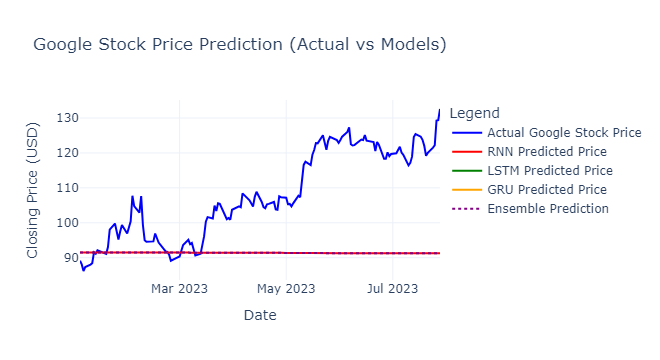

In [133]:
import plotly.graph_objects as go

fig = go.Figure()

# Actual Google stock price
fig.add_trace(go.Scatter(
    x=google_testing_complete["Date"],
    y=google_testing_complete["Close"],
    mode='lines',
    name='Actual Google Stock Price',
    line=dict(color='blue', width=2)
))

# RNN Prediction
if "RNN_Close" in google_prediction.columns:
    fig.add_trace(go.Scatter(
        x=google_prediction["Date"],
        y=google_prediction["RNN_Close"],
        mode='lines',
        name='RNN Predicted Price',
        line=dict(color='red', width=2)
    ))

# LSTM Prediction
if "LSTM_Close" in google_prediction.columns:
    fig.add_trace(go.Scatter(
        x=google_prediction["Date"],
        y=google_prediction["LSTM_Close"],
        mode='lines',
        name='LSTM Predicted Price',
        line=dict(color='green', width=2)
    ))

# GRU Prediction
if "GRU_Close" in google_prediction.columns:
    fig.add_trace(go.Scatter(
        x=google_prediction["Date"],
        y=google_prediction["GRU_Close"],
        mode='lines',
        name='GRU Predicted Price',
        line=dict(color='orange', width=2)
    ))

# Ensemble (optional)
if "Ensemble_Close" in google_prediction.columns:
    fig.add_trace(go.Scatter(
        x=google_prediction["Date"],
        y=google_prediction["Ensemble_Close"],
        mode='lines',
        name='Ensemble Prediction',
        line=dict(color='purple', width=2, dash='dot')
    ))

# Layout
fig.update_layout(
    title='Google Stock Price Prediction (Actual vs Models)',
    xaxis_title='Date',
    yaxis_title='Closing Price (USD)',
    legend_title='Legend',
    hovermode='x unified',
    hoverlabel=dict(bgcolor='white', font_size=12),
    template='plotly_white'
)

fig.show()

In [134]:
google_testing_complete["Date"] = pd.to_datetime(google_testing_complete["Date"])

google_testing_complete["Year"] = google_testing_complete["Date"].dt.year
google_testing_complete["Month"] = google_testing_complete["Date"].dt.month
google_testing_complete["Day"] = google_testing_complete["Date"].dt.day
google_testing_complete["Weekday"] = google_testing_complete["Date"].dt.weekday
google_testing_complete["IsMonthStart"] = google_testing_complete["Date"].dt.is_month_start.astype(int)
google_testing_complete["IsMonthEnd"] = google_testing_complete["Date"].dt.is_month_end.astype(int)

google_testing_complete.head()

Date       Open       High        Low      Close  Adj Close    Volume  \
0 2023-01-03  89.589996  91.050003  88.519997  89.120003  89.120003  28131200   
1 2023-01-04  90.349998  90.650002  87.269997  88.080002  88.080002  34854800   
2 2023-01-05  87.470001  87.570000  85.900002  86.199997  86.199997  27194400   
3 2023-01-06  86.790001  87.690002  84.860001  87.339996  87.339996  41381500   
4 2023-01-09  88.360001  90.050003  87.860001  88.019997  88.019997  29003900   

   Year  Month  Day  Weekday  IsMonthStart  IsMonthEnd  
0  2023      1    3        1             0           0  
1  2023      1    4        2             0           0  
2  2023      1    5        3             0           0  
3  2023      1    6        4             0           0  
4  2023      1    9        0             0           0